In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


df = pd.read_excel('ipl_2022_table_updated.xlsx')

columns_to_use = ['Matches Won','Average Of Top three strike Rates','avg of top 5 run scorers','Total sixes hit','Total fours hit','dot balls of top 5 ballers','Total no of batsmen sr greater than oneforty','Total 50s per team','Bowling average of top 3 bowlers matches played 10 or more than 10','Wickets taken by bowlers who played 10 or more than 10 matches']
df_selected = df[columns_to_use]

In [17]:
print(df)


   Team  Matches Won  Average Of Top three strike Rates  \
0    MI            4                             173.80   
1   CSK            4                             153.00   
2   KKR            6                             204.82   
3    GT           10                             166.14   
4   LSG            9                             149.90   
5    RR            9                             149.92   
6   RCB            8                             168.39   
7  PBKS            7                             168.46   
8    DC            7                             152.14   
9   SRH            6                             150.47   

   avg of top 5 run scorers  Total sixes hit  Total fours hit  \
0                     314.4               77              173   
1                     285.4               94              183   
2                     290.6               89              176   
3                     397.0               58              250   
4                     383

In [36]:
print(df.columns)

Index(['Team', 'Matches Won', 'Average Of Top three strike Rates',
       'avg of top 5 run scorers', 'Total sixes hit', 'Total fours hit',
       'dot balls of top 5 ballers',
       'Total no of batsmen sr greater than oneforty', 'Total 50s per team',
       'Bowling average of top 3 bowlers matches played 10 or more than 10',
       'Wickets taken by bowlers who played 10 or more than 10 matches'],
      dtype='object')


In [37]:
print(df_selected)

   Matches Won  Average Of Top three strike Rates  avg of top 5 run scorers  \
0            4                             173.80                     314.4   
1            4                             153.00                     285.4   
2            6                             204.82                     290.6   
3           10                             166.14                     397.0   
4            9                             149.90                     383.8   
5            9                             149.92                     400.4   
6            8                             168.39                     354.6   
7            7                             168.46                     318.0   
8            7                             152.14                     311.2   
9            6                             150.47                     348.4   

   Total sixes hit  Total fours hit  dot balls of top 5 ballers  \
0               77              173                          48

In [38]:
correlation_matrix = df_selected.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                                    Matches Won  \
Matches Won                                            1.000000   
Average Of Top three strike Rates                     -0.218319   
avg of top 5 run scorers                               0.853515   
Total sixes hit                                       -0.208766   
Total fours hit                                        0.782420   
dot balls of top 5 ballers                            -0.191049   
Total no of batsmen sr greater than oneforty          -0.117688   
Total 50s per team                                     0.528594   
Bowling average of top 3 bowlers matches played...    -0.295201   
Wickets taken by bowlers who played 10 or more ...     0.665042   

                                                    Average Of Top three strike Rates  \
Matches Won                                                                 -0.218319   
Average Of Top three strike Rates                               

In [47]:
X = df[['Total fours hit', 'Total 50s per team']]
y = df['Matches Won']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")


print(f"\nCoefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")




Mean Squared Error: 8.875804131010009

Coefficients: [0.02484993 0.63308551]
Intercept: -4.566766261870033


In [49]:
#Better than the previous model since the MSE is less
#This output depicts that a coefficient of 1.3203 for 'Total fours hit' 
#which means that for every one-unit increase in 'Total fours hit', the predicted Matches Won increases by approximately 1.3203.
#This output depicts that a coefficient of 0.411 for 'Total 50s per team'
#Which means for every one-unit increase in 'Total 50s per team', the predicted Matches Won increases by approximately 0.4120.
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
X = df[['Total fours hit', 'Total 50s per team']]
y = df['Matches Won']

model = make_pipeline(StandardScaler(), Ridge(alpha=0.1))
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

print(f"\nMean Squared Error: {mse}")

print(f"\nCoefficients: {model.named_steps['ridge'].coef_}")
print(f"Intercept: {model.named_steps['ridge'].intercept_}")


Mean Squared Error: 1.342573215755866

Coefficients: [1.3203288  0.41197693]
Intercept: 7.0


C:\Users\ayaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ayaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

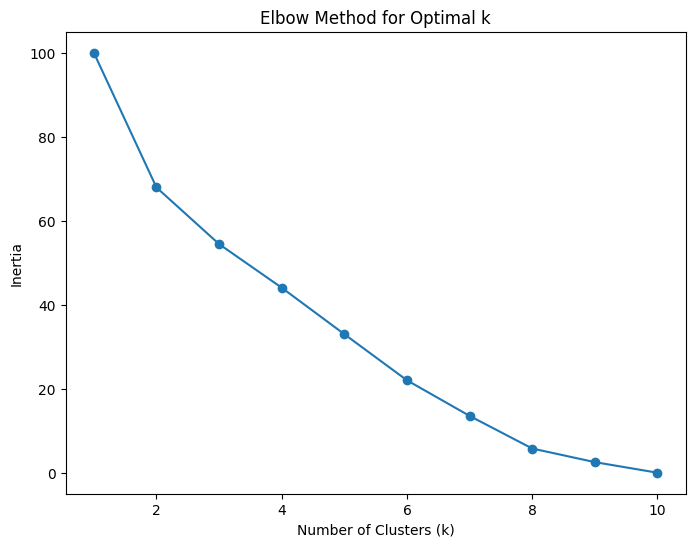

C:\Users\ayaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


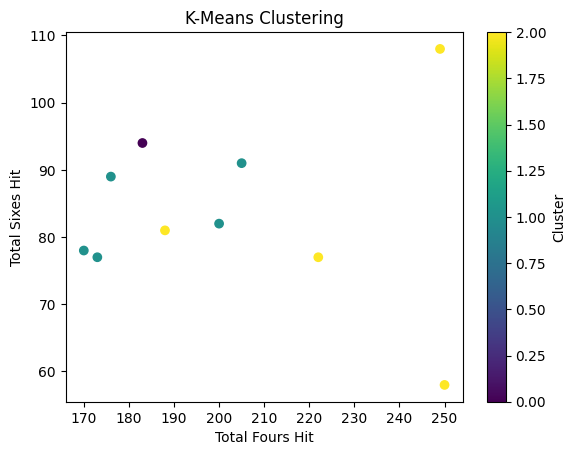

         Team  Matches Won  Average Of Top three strike Rates  \
Cluster                                                         
0        0.00          4.0                           153.0000   
1        4.80          6.0                           169.9380   
2        5.25          9.0                           158.5875   

         avg of top 5 run scorers  Total sixes hit  Total fours hit  \
Cluster                                                               
0                          285.40             94.0           183.00   
1                          316.52             83.4           184.80   
2                          383.95             81.0           227.25   

         dot balls of top 5 ballers  \
Cluster                               
0                             41.00   
1                             45.60   
2                             43.75   

         Total no of batsmen sr greater than oneforty  Total 50s per team  \
Cluster                                      

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder


columns_to_use = ['Team','Matches Won','Average Of Top three strike Rates','avg of top 5 run scorers','Total sixes hit','Total fours hit','dot balls of top 5 ballers','Total no of batsmen sr greater than oneforty','Total 50s per team','Bowling average of top 3 bowlers matches played 10 or more than 10','Wickets taken by bowlers who played 10 or more than 10 matches']
df_selected = df[columns_to_use]

label_encoder = LabelEncoder()
df_selected['Team'] = label_encoder.fit_transform(df_selected['Team'])


scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected.drop('Team', axis=1))  # Drop 'Team' for scaling


inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_selected_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow method, choose an appropriate value of k (the "elbow point")
# For example, if the elbow point is at k=3, set k=3

# Apply K-Means clustering with chosen k
k = 3  # Set the optimal value of k based on the graph
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(df_selected_scaled)
df_selected['Cluster'] = clusters

plt.scatter(df_selected['Total fours hit'], df_selected['Total sixes hit'], c=clusters, cmap='viridis')
plt.xlabel('Total Fours Hit')
plt.ylabel('Total Sixes Hit')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


cluster_means = df_selected.groupby('Cluster').mean()
print(cluster_means)


In [30]:
unique_clusters = df_selected['Cluster'].unique()

for cluster_label in unique_clusters:
    print(f"Cluster {cluster_label}:")
    cluster_data = df_selected[df_selected['Cluster'] == cluster_label]
    print(cluster_data)
    print("\n")

Cluster 1:
   Team  Matches Won  Average Of Top three strike Rates  \
0     5            4                             173.80   
2     3            6                             204.82   
7     6            7                             168.46   
8     1            7                             152.14   
9     9            6                             150.47   

   avg of top 5 run scorers  Total sixes hit  Total fours hit  \
0                     314.4               77              173   
2                     290.6               89              176   
7                     318.0               82              200   
8                     311.2               91              205   
9                     348.4               78              170   

   dot balls of top 5 ballers  Total no of batsmen sr greater than oneforty  \
0                          48                                             4   
2                          44                                             6   
7     

In [ ]:
# Cluster 0
# 0=csk

# Cluster 1
# 5=mi
# 3=kkr
# 6=pbks
# 1=DC
# 9=srh

# Cluster 2
# 2=GT
# 4=LSG
# 8=RR
# 7=RCB





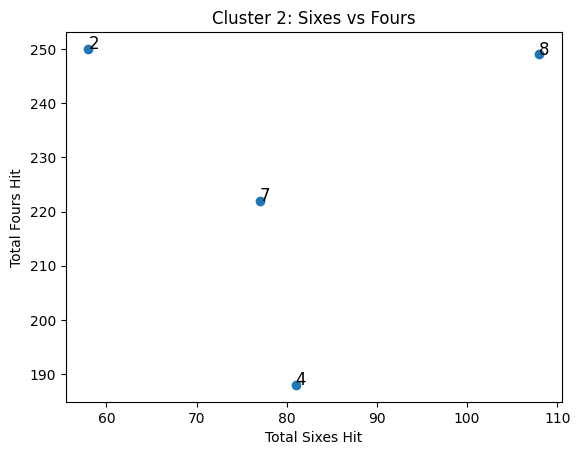

In [32]:
plt.scatter(df_selected.loc[df_selected['Cluster'] == 2, 'Total sixes hit'], df_selected.loc[df_selected['Cluster'] == 2, 'Total fours hit'])

for team, sixes, fours in zip(df_selected.loc[df_selected['Cluster'] == 2, 'Team'], df_selected.loc[df_selected['Cluster'] == 2, 'Total sixes hit'], df_selected.loc[df_selected['Cluster'] == 2, 'Total fours hit']):
    plt.text(sixes, fours, team, fontsize=12)

plt.xlabel('Total Sixes Hit')
plt.ylabel('Total Fours Hit')
plt.title('Cluster 2: Sixes vs Fours')
plt.show()


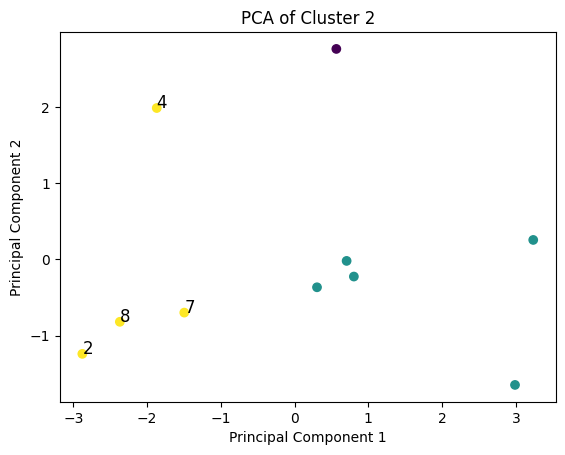

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_selected_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')

for team, x, y in zip(df_selected.loc[df_selected['Cluster'] == 2, 'Team'], pca_result[clusters == 2, 0], pca_result[clusters == 2, 1]):
    plt.text(x, y, team, fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Cluster 2')
plt.show()


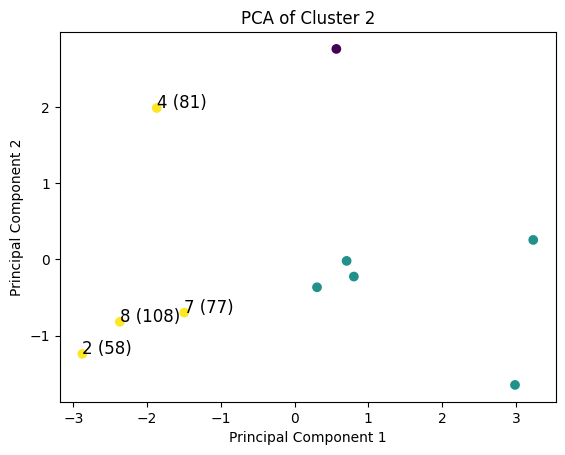

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_selected_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')

for team, x, y, val in zip(df_selected.loc[df_selected['Cluster'] == 2, 'Team'], pca_result[clusters == 2, 0], pca_result[clusters == 2, 1], df_selected.loc[df_selected['Cluster'] == 2, 'Total sixes hit']):
    plt.text(x, y, f'{team} ({val})', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Cluster 2')
plt.show()


In [ ]:
# means that these teams may have different performance patterns or characteristics compared to the majority of the teams in the cluster. 
# They might not excel in the specific aspects that are represented by PC1 and PC2, which are the directions of maximum variability in the data.

In [40]:
columns_to_use = ['Team','Matches Won','Average Of Top three strike Rates','avg of top 5 run scorers','Total sixes hit','Total fours hit','dot balls of top 5 ballers','Total no of batsmen sr greater than oneforty','Total 50s per team','Bowling average of top 3 bowlers matches played 10 or more than 10','Wickets taken by bowlers who played 10 or more than 10 matches']
df_selected = df[columns_to_use]

import scipy.stats as stats

# Filter the DataFrame to include only MI team
mi_data = df_selected[df_selected['Team'] == 'MI']

# Define the number of trials (total matches played by MI)
total_matches_mi = 16  # Updated total matches count for MI

# Define the probability of success (winning a match for MI)
p_success_mi = mi_data['Matches Won'].sum() / total_matches_mi  # Calculate probability of success

# Check if p_success_mi is too close to 0 or 1
if p_success_mi < 0.01 or p_success_mi > 0.99:
    # Handle cases where probability is too small or too large
    if p_success_mi < 0.01:
        p_success_mi = 0.01
    else:
        p_success_mi = 0.99

# Generate the binomial distribution for MI
binom_dist_mi = stats.binom(total_matches_mi, p_success_mi)

# Calculate probabilities for winning 0, 1, 2, and 3 matches out of the next 3
prob_0_wins_next_3 = binom_dist_mi.pmf(0)
prob_1_win_next_3 = binom_dist_mi.pmf(1)
prob_2_wins_next_3 = binom_dist_mi.pmf(2)
prob_3_wins_next_3 = binom_dist_mi.pmf(3)

# Print the probabilities
print(f"Probability of MI winning 0 out of the next 3 matches: {prob_0_wins_next_3:.4f}")
print(f"Probability of MI winning 1 out of the next 3 matches: {prob_1_win_next_3:.4f}")
print(f"Probability of MI winning 2 out of the next 3 matches: {prob_2_wins_next_3:.4f}")
print(f"Probability of MI winning 3 out of the next 3 matches: {prob_3_wins_next_3:.4f}")



Probability of MI winning 0 out of the next 3 matches: 0.0100
Probability of MI winning 1 out of the next 3 matches: 0.0535
Probability of MI winning 2 out of the next 3 matches: 0.1336
Probability of MI winning 3 out of the next 3 matches: 0.2079


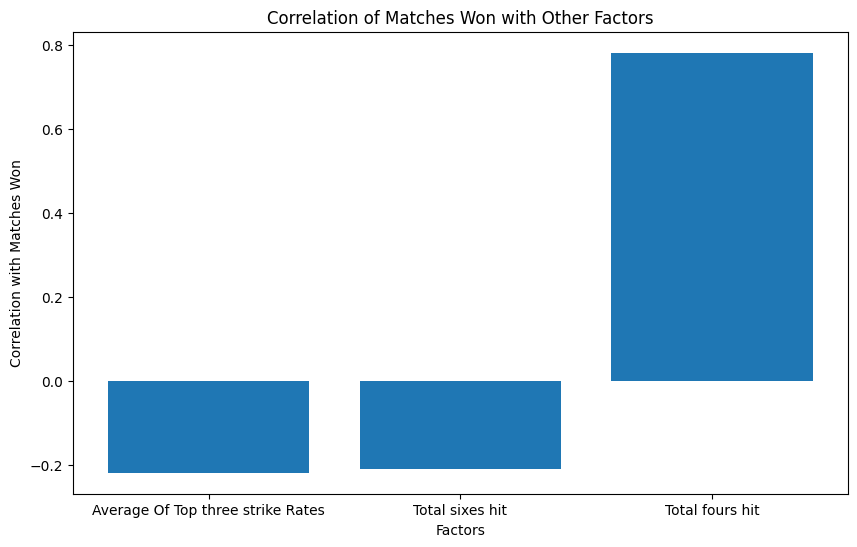

Correlation Values:
Average Of Top three strike Rates   -0.218319
Total sixes hit                     -0.208766
Total fours hit                      0.782420
Name: Matches Won, dtype: float64


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_selected contains the relevant data
# If not, replace it with the correct DataFrame

# Select the relevant columns for correlation analysis
columns_for_correlation = ['Matches Won', 'Average Of Top three strike Rates', 'Total sixes hit', 'Total fours hit']

# Create a new DataFrame with selected columns
df_for_correlation = df_selected[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Extract the correlation values
matches_won_correlation = correlation_matrix.loc['Matches Won', :]

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.bar(matches_won_correlation.index[1:], matches_won_correlation[1:])
plt.xlabel('Factors')
plt.ylabel('Correlation with Matches Won')
plt.title('Correlation of Matches Won with Other Factors')
plt.show()

print("Correlation Values:")
print(matches_won_correlation[1:])


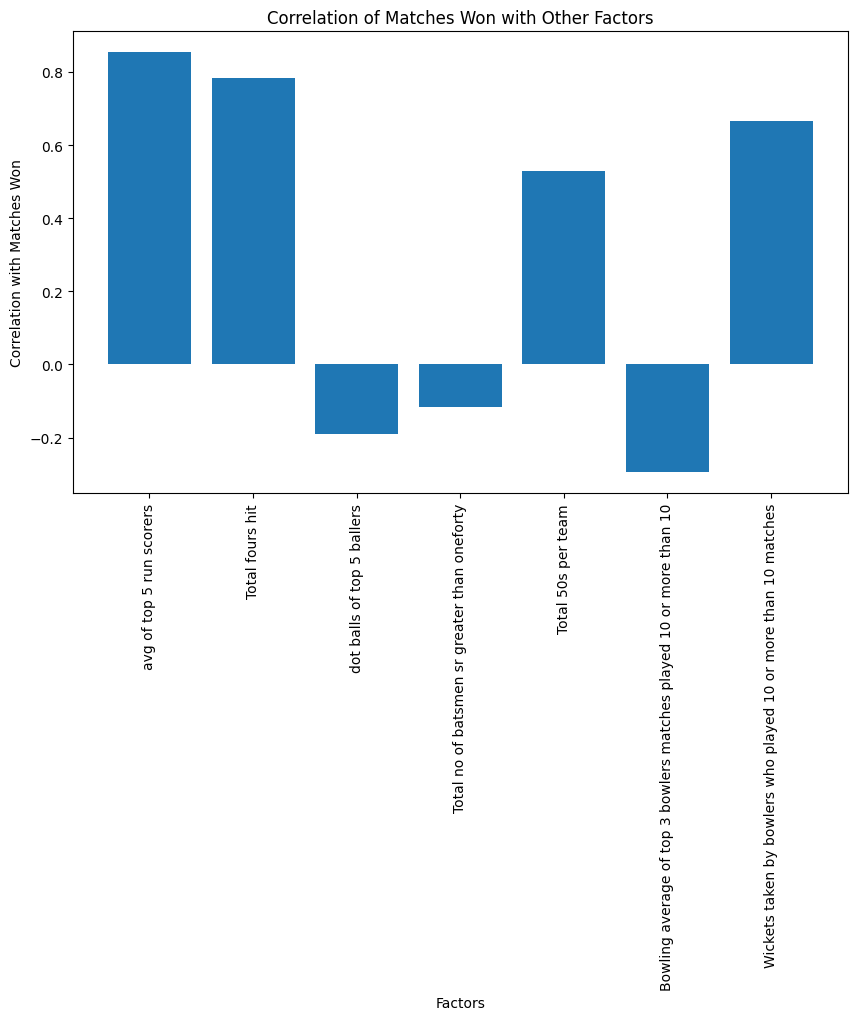

Correlation Values:
avg of top 5 run scorers                                              0.853515
Total fours hit                                                       0.782420
dot balls of top 5 ballers                                           -0.191049
Total no of batsmen sr greater than oneforty                         -0.117688
Total 50s per team                                                    0.528594
Bowling average of top 3 bowlers matches played 10 or more than 10   -0.295201
Wickets taken by bowlers who played 10 or more than 10 matches        0.665042
Name: Matches Won, dtype: float64


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_selected contains the relevant data
# If not, replace it with the correct DataFrame

# Select the relevant columns for correlation analysis
columns_for_correlation = ['Matches Won','avg of top 5 run scorers',
                            'Total fours hit', 'dot balls of top 5 ballers',
                               'Total no of batsmen sr greater than oneforty', 'Total 50s per team',
                           'Bowling average of top 3 bowlers matches played 10 or more than 10',
                           'Wickets taken by bowlers who played 10 or more than 10 matches']

# Create a new DataFrame with selected columns
df_for_correlation = df_selected[columns_for_correlation]

# Calculate the correlation matrix
correlation_matrix = df_for_correlation.corr()

# Extract the correlation values
matches_won_correlation = correlation_matrix.loc['Matches Won', :]

# Plot the correlations
plt.figure(figsize=(10, 6))
plt.bar(matches_won_correlation.index[1:], matches_won_correlation[1:])
plt.xlabel('Factors')
plt.ylabel('Correlation with Matches Won')
plt.title('Correlation of Matches Won with Other Factors')
plt.xticks(rotation=90)
plt.show()

print("Correlation Values:")
print(matches_won_correlation[1:])


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df_selected contains the relevant data
# If not, replace it with the correct DataFrame

# Step 1: Prepare data
selected_features = ['Matches Won', 'Average Of Top three strike Rates', 'Total sixes hit', 'Total fours hit']
X = df_selected[selected_features]
y = df_selected['Matches Won']

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a model
model = SVR(kernel='linear')  # You can try different kernels (e.g., 'linear', 'rbf', etc.)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error: 0.15
Mean Squared Error: 0.03
R-squared (R2) Score: 0.99


In [55]:
# Assuming df_selected contains the relevant data

# Step 1: Prepare data
selected_features = ['Matches Won', 'Average Of Top three strike Rates', 'Total sixes hit', 'Total fours hit']
X = df_selected[selected_features]
y = df_selected['Matches Won']

# Step 2: Choose a model and train it
model = SVR(kernel='linear')  # You can use different kernels as needed
model.fit(X, y)


SVR(kernel='linear')

In [59]:
# Assuming model is already trained and df_selected contains the relevant data

# Data for the teams you want to predict for
teams_to_predict = [
    {'Matches Won': 4, 'Average Of Top three strike Rates': 174, 'Total sixes hit': 77, 'Total fours hit': 173},  # MI
    {'Matches Won': 4, 'Average Of Top three strike Rates': 153, 'Total sixes hit': 94, 'Total fours hit': 183},  # CSK
    {'Matches Won': 10, 'Average Of Top three strike Rates': 166, 'Total sixes hit': 58, 'Total fours hit': 250}  # GT
]

# Step 2: Prepare data
selected_features = ['Matches Won', 'Average Of Top three strike Rates', 'Total sixes hit', 'Total fours hit']


for team_data in teams_to_predict:
    # Create a DataFrame with the feature values for the current team
    team_df = pd.DataFrame([team_data], columns=selected_features)

    # Step 3: Make predictions
    predicted_matches_won = model.predict(team_df)

    # Print the predicted number of matches won for each team
    print(f"Predicted Matches Won for the team: {predicted_matches_won[0]:.2f}")


Predicted Matches Won for the team: 4.10
Predicted Matches Won for the team: 4.10
Predicted Matches Won for the team: 10.10


In [60]:
# Assuming model is already trained and df_selected contains the relevant data

# Data for the teams you want to predict for
teams_to_predict = [
    {'Matches Won': 4, 'Average Of Top three strike Rates': 174, 'Total sixes hit': 77, 'Total fours hit': 173},  # MI
    {'Matches Won': 4, 'Average Of Top three strike Rates': 153, 'Total sixes hit': 94, 'Total fours hit': 183},  # CSK
    {'Matches Won': 10, 'Average Of Top three strike Rates': 166, 'Total sixes hit': 58, 'Total fours hit': 250}  # GT
]

# Step 2: Prepare data
selected_features = ['Matches Won', 'Average Of Top three strike Rates', 'Total sixes hit', 'Total fours hit']

for team_data in teams_to_predict:
    # Create a DataFrame with the feature values for the current team
    team_df = pd.DataFrame([team_data], columns=selected_features)

    # Step 3: Make predictions for Matches Won
    predicted_matches_won = model.predict(team_df)

    # Step 4: Make predictions for Matches Lost
    team_df['Matches Won'] = 16 - team_data['Matches Won']  # Calculate Matches Lost
    predicted_matches_lost = model.predict(team_df)

    # Print the predicted number of matches won and lost for each team
    print(f"Predicted Matches Won for the team: {predicted_matches_won[0]:.2f}")
    print(f"Predicted Matches Lost for the team: {predicted_matches_lost[0]:.2f}")


Predicted Matches Won for the team: 4.10
Predicted Matches Lost for the team: 11.66
Predicted Matches Won for the team: 4.10
Predicted Matches Lost for the team: 11.66
Predicted Matches Won for the team: 10.10
Predicted Matches Lost for the team: 6.32


In [64]:
#using SVM model Cross-Validation for Model Evaluation
from sklearn.model_selection import cross_val_score


scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')


mse_scores = -scores


mae_scores = np.sqrt(mse_scores)


print(f'Cross-Validation MAE Scores: {mae_scores}')
print(f'Mean MAE: {mae_scores.mean()}')


Cross-Validation MAE Scores: [0.23803672 0.7973494  0.23757938 0.03214027 0.01775237]
Mean MAE: 0.26457162720729965


In [ ]:

# Cross-Validation MAE Scores:

# For each fold in the cross-validation (in this case, 5 folds), the MAE score is calculated.
# These scores are: [0.23803672, 0.7973494, 0.23757938, 0.03214027, 0.01775237].
#These scores indicate the performance of the model on different subsets of the data. Lower values of MAE indicate better performance.
#Mean MAE:

#This is the average of the MAE scores calculated for each fold.
#In this case, the mean MAE is approximately 0.265.
#The mean MAE provides an overall assessment of the model's performance across all the folds. 
#It's a useful metric to get a sense of how well the model is expected to perform on new, unseen data.

# #Fold 1: EXAMPLE

# Training Set: Sample 1 to 80
# Test Set: Sample 81 to 100
# Fold 2:

# Training Set: Sample 21 to 100
# Test Set: Sample 1 to 20
# Fold 3:

# Training Set: Sample 1 to 20 and 41 to 100
# Test Set: Sample 21 to 40
# Fold 4:

# Training Set: Sample 1 to 40 and 61 to 100
# Test Set: Sample 41 to 60
# Fold 5:

# Training Set: Sample 1 to 60
# Test Set: Sample 61 to 100

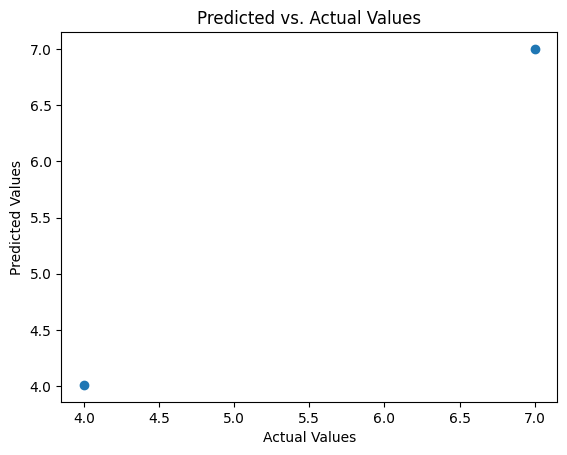

In [67]:
import matplotlib.pyplot as plt


y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()


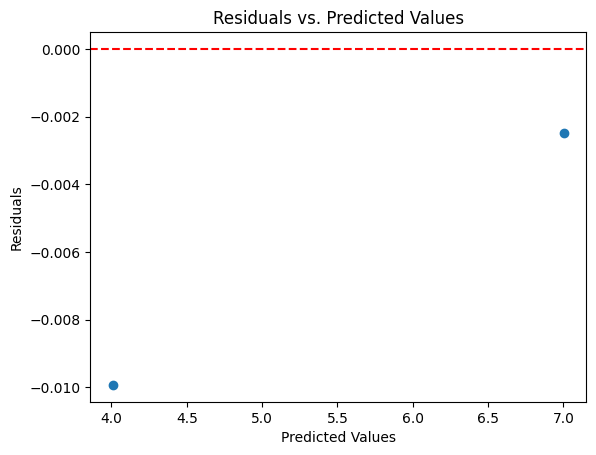

In [68]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


